# Test Savitsky-Golay  Test Waveforms

This notebook reads in the test waveform and applys the scipy savitsky-golay filter.

# Setup

## Define plot defaults

In [1]:
options(repr.plot.width = 10, repr.plot.height = 4)

## Import libraries

In [2]:
#install.packages("signal")

In [3]:
library(signal)


Attaching package: 'signal'


The following objects are masked from 'package:stats':

    filter, poly




# Create the signals

Define the signal features (imported from Python)

In [4]:
fs_hz    <- 6400             # sample rate [Hz]
d_f_sig  <- 10               # signal frequency [Hz]
i_cycles <- 5                # number of cycles
d_t_end  <- i_cycles / d_f_sig
i_ns     <- round(fs_hz * d_t_end)

In [5]:
# Time vector
d_time <- seq(0, d_t_end, length.out = i_ns)

# Signal amplitude
d_amp_sin <- 1.0

# Generate noisy sine wave
set.seed(0)  # for reproducibility
d_sig_sin <- d_amp_sin * sin(2 * pi * d_f_sig * d_time) 

## Plot the signals

Compute major/minor ticks (same logic as Python)

In [6]:
d_xticks_major <- seq(0, i_cycles, by = 1) / ( 2 * d_f_sig)
print(d_xticks_major)
d_xticks_minor <- seq(0, i_cycles, by = 0.2) / d_f_sig

d_yticks_major <- seq(-d_amp_sin, d_amp_sin, length.out = 5)
print(d_yticks_major)
d_yticks_minor <- seq(-d_amp_sin, d_amp_sin, length.out = 9)
print(d_yticks_minor)

[1] 0.00 0.05 0.10 0.15 0.20 0.25
[1] -1.0 -0.5  0.0  0.5  1.0
[1] -1.00 -0.75 -0.50 -0.25  0.00  0.25  0.50  0.75  1.00


Uncomment this line to save to a file

In [7]:
pdf("Pane01.pdf", width = 10, height = 4, useDingbats = FALSE)

pdf 
  3

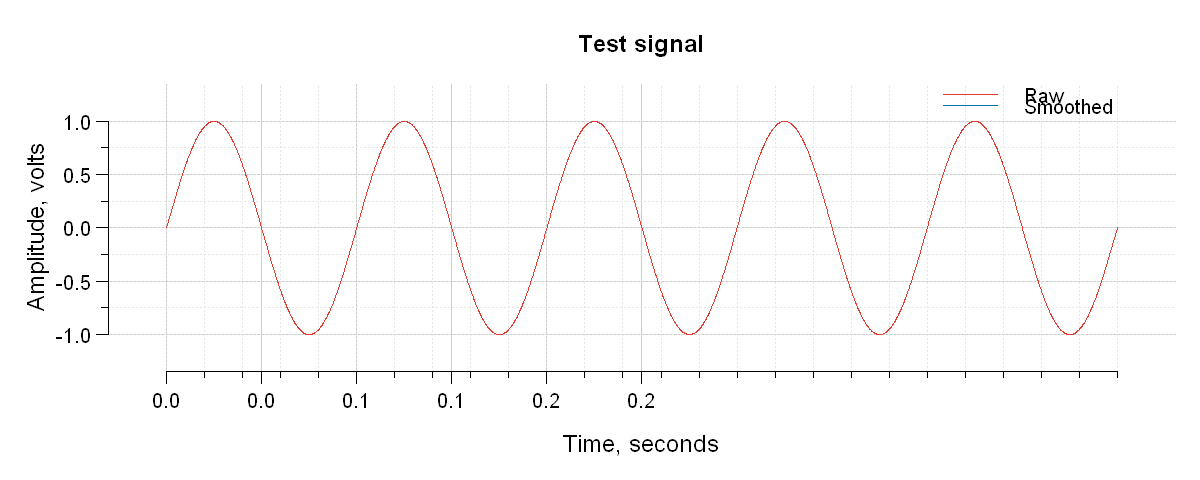

In [8]:
# --- Plot styling ---
par(family = "sans",  # Arial equivalent on most systems
    mar = c(4.5, 4.5, 3.5, 1.0),
    mgp = c(2.5, 0.7, 0),
    cex.lab = 1.2,
    cex.axis = 1.0,
    cex.main = 1.2,
    las = 1)

# --- Explicitly start a new plot region ---
plot.new()

# --- Set up the coordinate system (no data drawn yet) ---
plot.window(xlim = c(-0.01, 0.51),
            ylim = c(-d_amp_sin*1.25, d_amp_sin*1.25))

# --- Draw axes and labels manually ---
title(main = "Test signal",
      xlab = "Time, seconds",
      ylab = "Amplitude, volts")

# --- Add gridlines ---
# Major gridlines (solid)
abline(h = d_yticks_major, col = "gray80", lty = 1)
abline(v = d_xticks_major, col = "gray80", lty = 1)

# Minor gridlines (dotted)
abline(h = d_yticks_minor, col = "gray90", lty = 3)
abline(v = d_xticks_minor, col = "gray90", lty = 3)

# --- Draw signals ---
lines(d_time, d_sig_sin, col = "#E13C30", lwd = 1.0)     # raw signal (red)

# --- Add major/minor tick marks and labels ---
axis(side = 1, at = d_xticks_major,
     labels = formatC(d_xticks_major, digits = 1, format = "f"))
axis(side = 1, at = d_xticks_minor, labels = FALSE, tcl = -0.25)

axis(side = 2, at = d_yticks_major,
     labels = formatC(d_yticks_major, digits = 1, format = "f"))
axis(side = 2, at = d_yticks_minor, labels = FALSE, tcl = -0.25)

# --- Add legend ---
legend("topright",
       legend = c("Raw", "Smoothed"),
       col = c("#E13C30", "#0072B2"),
       lwd = c(1.0, 1.5),
       bty = "n")

dev.off()
